In [ ]:
import tensorflow as tf
import pathlib
import PIL
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

roses = list(data_dir.glob('roses/*.jpg'))
PIL.Image.open(str(roses[0]))
print(roses[0].shape)

228813984/228813984 [==============================] - 5s 0us/step
3670


AttributeError: ignored

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

(train_ds, val_ds) = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='both',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
class_names = train_ds.class_names

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Using 734 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.Rescaling(1./255)
normalised_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalised_ds))
print(np.max(image_batch[0]))

1.0


In [ ]:
num_classes = len(class_names)

model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 118s 1s/step - loss: 1.3688 - accuracy: 0.4196 - val_loss: 1.0959 - val_accuracy: 0.5450
Epoch 2/10
92/92 [==============================] - 114s 1s/step - loss: 0.9917 - accuracy: 0.6151 - val_loss: 0.9740 - val_accuracy: 0.6063
Epoch 3/10
92/92 [==============================] - 111s 1s/step - loss: 0.8266 - accuracy: 0.6887 - val_loss: 0.9601 - val_accuracy: 0.6308
Epoch 4/10
92/92 [==============================] - 112s 1s/step - loss: 0.6414 - accuracy: 0.7606 - val_loss: 0.9964 - val_accuracy: 0.6431
Epoch 5/10
92/92 [==============================] - 117s 1s/step - loss: 0.4357 - accuracy: 0.8454 - val_loss: 0.9706 - val_accuracy: 0.6567
Epoch 6/10
92/92 [==============================] - 113s 1s/step - loss: 0.2492 - accuracy: 0.9179 - val_loss: 1.2396 - val_accuracy: 0.6144
Epoch 7/10
92/92 [==============================] - 116s 1s/step - loss: 0.1365 - accuracy: 0.9564 - val_loss: 1.2934 - val_accuracy: 0.6730
Epoch 8/10
92

In [ ]:
model.evaluate(val_ds, verbose=2)

23/23 - 8s - loss: 1.7624 - accuracy: 0.6621 - 8s/epoch - 354ms/step


[1.7624045610427856, 0.6621253490447998]

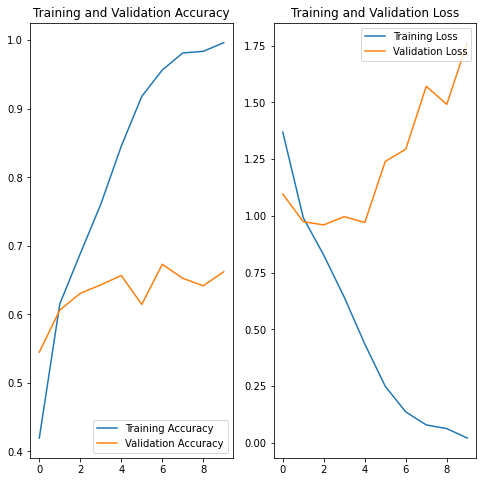

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model = models.Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 15
history2 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


92/92 [==============================] - 142s 1s/step - loss: 1.3487 - accuracy: 0.4057 - val_loss: 1.1115 - val_accuracy: 0.5613
Epoch 2/15
92/92 [==============================] - 131s 1s/step - loss: 1.0548 - accuracy: 0.5760 - val_loss: 1.0130 - val_accuracy: 0.5926
Epoch 3/15
92/92 [==============================] - 128s 1s/step - loss: 0.9431 - accuracy: 0.6369 - val_loss: 0.9830 - val_accuracy: 0.6294
Epoch 4/15
92/92 [==============================] - 130s 1s/step - loss: 0.8822 - accuracy: 0.6614 - val_loss: 0.8467 - val_accuracy: 0.6744
Epoch 5/15
92/92 [==============================] - 128s 1s/step - loss: 0.8045 - accuracy: 0.6846 - val_loss: 0.8364 - val_accuracy: 0.6894
Epoch 6/15
92/92 [==============================] - 127s 1s/step - loss: 0.7666 - accuracy: 0.7091 - val_loss: 0.8636 - val_accuracy: 0.6649
Epoch 7/15
92/92 [==============================] - 127s 1s/step - loss: 0.7021 - accuracy: 0.7289 - val_loss: 0.7778 - val_accuracy: 0.6989
Epoch 8/15
92/92 [======

In [ ]:
model.evaluate(val_ds, verbose=2)

23/23 - 8s - loss: 0.8269 - accuracy: 0.7098 - 8s/epoch - 332ms/step


[0.8268901705741882, 0.7098092436790466]

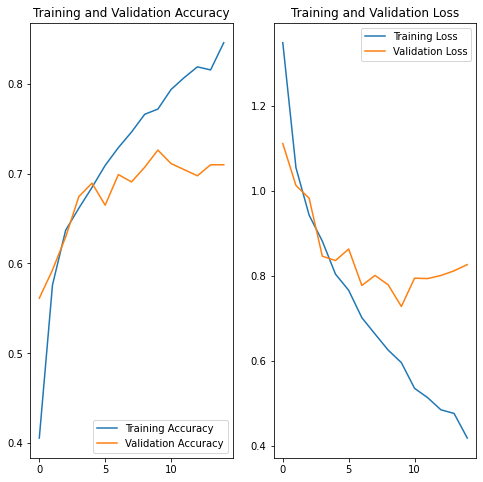

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()